<a href="https://colab.research.google.com/github/RemiCailliot/Data_Engineering_II_NodeJS/blob/main/1_deep_learning_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network - basic behavior

Laurent Cetinsoy - Datadidacte - personal use only

In order to get a bit of understanding and practice with keras we are going to test a few different architectures

## Effect of the activation function

Load the fashion mnist dataset from the tensorflow.keras.datasets module 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

Display the first image of the train dataset with matplotlib

4431872/4422102 [==============================] - 0s 0us/step


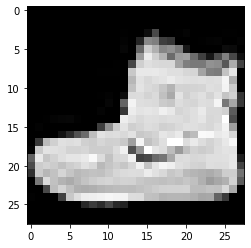

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[0], "gray")

Display the number of classes in the dataset

In [3]:
print(train_labels.shape)

(60000,)


Create a simple neural network with the following structure : 

- One dense layer with **sigmoid** activation and 300 neurones
- One dense layer with **sigmoid** activation and 100 neurones 
- One dense layer with softmax activation. How many neurones should there be ? 

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model = Sequential()
model.add(Dense(300,activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

Compile the model with the sgd optimizer and the sparse_categorical_crossentropy_loss

In [5]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")

Reshape the images so that each image is a vector. Remember to normalize the dataset by doing a min-max scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
tri_shaped  =train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
tei_shaped  =test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])

mms = MinMaxScaler()
tri_scaled= mms.fit_transform(tri_shaped)
tei_scaled= mms.fit_transform(tei_shaped)

Train the model for 10 epochs and display the loss versus the number of epochs. For that you can use Keras callbacks : https://keras.io/api/callbacks/

Does it train well ? 

In [7]:
model.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9268 - val_loss: 1.4540
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1995 - val_loss: 1.0291
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9154 - val_loss: 0.8399
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7766 - val_loss: 0.7444
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7026 - val_loss: 0.6895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6584 - val_loss: 0.6575
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6264 - val_loss: 0.6286
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6005 - val_loss: 0.6064
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5793 - val_loss: 0.5874
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.560

Make another model by replacing this time the sigmoid activations by Relu. Train again the model and display the loss curve. Is it better ? 

In [8]:
model2 = Sequential()
model2.add(Dense(300,activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")
model2.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7039 - val_loss: 0.5550
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4808 - val_loss: 0.4749
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4371 - val_loss: 0.4643
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4105 - val_loss: 0.4407
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3912 - val_loss: 0.4395
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3743 - val_loss: 0.4032
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3608 - val_loss: 0.3881
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3489 - val_loss: 0.3989
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3382 - val_loss: 0.3815
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.329

Do the same with the selu function 

In [9]:
model3 = Sequential()
model3.add(Dense(300,activation='selu'))
model3.add(Dense(100, activation='selu'))
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")
model3.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5703 - val_loss: 0.4917
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4419 - val_loss: 0.4536
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4094 - val_loss: 0.4341
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3896 - val_loss: 0.4475
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - val_loss: 0.4145
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3606 - val_loss: 0.4001
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3503 - val_loss: 0.3984
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3414 - val_loss: 0.4167
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3334 - val_loss: 0.3835
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.325

## Effect of the size 

In this section we want to study the effect of the size of the network on the learning

Re-use the previous network and try to increase its size by using the following number of neurones : 

-  800 for first layer
- 500 for second layer
- same size


You might need to train the network longer, but does it reach a better performance ? 

In [10]:
model4 = Sequential()
model4.add(Dense(800,activation='selu'))
model4.add(Dense(500, activation='selu'))
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")
model4.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5461 - val_loss: 0.4620
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4352 - val_loss: 0.4414
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4072 - val_loss: 0.4239
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3886 - val_loss: 0.4134
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - val_loss: 0.4220
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3640 - val_loss: 0.4023
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3531 - val_loss: 0.3923
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3435 - val_loss: 0.3903
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3359 - val_loss: 0.3949
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.328

Bonus : train a big network (more than 5 layers). Does it overfit or has it still good performance ? 

In [ ]:
model5 = Sequential()
model5.add(Dense(1000,activation='selu'))
model5.add(Dense(800,activation='selu'))
model5.add(Dense(500, activation='selu'))
model5.add(Dense(250, activation='selu'))
model5.add(Dense(100, activation='selu'))
model5.add(Dense(10,activation='softmax'))
model5.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")
model5.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4918 - val_loss: 0.4214
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3662 - val_loss: 0.3731
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3285 - val_loss: 0.3790
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3051 - val_loss: 0.3390
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2862 - val_loss: 0.3462
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2711 - val_loss: 0.3355
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2583 - val_loss: 0.3441
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2467 - val_loss: 0.3332
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2380 - val_loss: 0.3252
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

## Effect of the parameter initialization 

The way the parameters of a network are initialized can have a great impact on the training process. 



Create a model with the same structure as the previous section. Initialize all weight values to 0 (cf https://keras.io/api/layers/initializers/)

In [25]:
from tensorflow.keras import initializers
model6 = Sequential()
model6.add(Dense(800,activation='selu', kernel_initializer=initializers.Zeros(), bias_initializer=initializers.Zeros()))
model6.add(Dense(500, activation='selu', kernel_initializer=initializers.Zeros(), bias_initializer=initializers.Zeros()))
model6.add(Dense(100, activation='selu', kernel_initializer=initializers.Zeros(), bias_initializer=initializers.Zeros()))
model6.add(Dense(10,activation='softmax', kernel_initializer=initializers.Zeros(), bias_initializer=initializers.Zeros()))


Train the model on the dataset and display the loss. Are you shocked ? 

In [26]:
model6.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")
model6.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.302

## Effect of the optimizer

This time we want to study the effect of the optimization process on the network 


Instanciate the Optimizer SGD with a learning rate equaling to 0.1 and train the model 

In [27]:
from tensorflow.keras import optimizers
model7 = Sequential()
model7.add(Dense(800,activation='selu'))
model7.add(Dense(500, activation='selu'))
model7.add(Dense(10,activation='softmax'))
opt = optimizers.SGD(learning_rate=0.1)
model7.compile(optimizer=opt, loss="sparse_categorical_crossentropy")
model7.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: nan - val_loss: nan
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan


Do the same with a learning rate of 0.01

In [21]:
opt2 = optimizers.SGD(learning_rate=0.01)
model6.compile(optimizer=opt2, loss="sparse_categorical_crossentropy")
model6.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan


Do the same with a learning rate of 0.9. Does it still work ? 

In [22]:
from tensorflow.keras import optimizers
opt3 = optimizers.SGD(learning_rate=0.9)
model6.compile(optimizer=opt3, loss="sparse_categorical_crossentropy")
model6.fit(tri_scaled, train_labels, epochs=10,validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan


Use the callback Reduce learning rate on plateau (https://keras.io/api/callbacks/reduce_lr_on_plateau/) and start with a pretty high learning rate. Is the learning faster ?


In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.9)
model6.fit(tri_scaled, train_labels, epochs=10, callbacks=[reduce_lr], validation_data=(tei_scaled,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - val_loss: nan - lr: 0.9000
Epoch 10/10
1875/18

Bonus : with the https://keras.io/api/callbacks/learning_rate_scheduler/ 

Implement the cyclical learning rate schema as follow (from "Cyclical Learning Rates for Training Neural Networks" Smith - https://arxiv.org/abs/1506.01186)

Bonus : do the study activation function and size on a more complexe dataset like cifar 10 

Bonus : do the same with a small convolutional network

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=56a14241-1a4a-43c4-96a0-4bee7f0d0226' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>